#Problem Statement:

Titles of Code Blocks to be shown in Notebook :
1. Import required libraries and the dataset
2. Visualise a sample of dataset
3. Data preprocessing
4. Sequential Model Building with Activation for each layer
5. Compile with categorical CE loss and metric accuracy
6. Train Model with cross validation, with total time taken shown for 20 epochs
7. Visualise Loss and Accuracy history
8. Show Confusion Matrix for validation dataset

Dataset: MNIST database of handwritten digits https://www.tensorflow.org/datasets/catalog/overview

#Hyperparameter Experiments :
1. Network Depth : 
1. 1 Hidden Layer of 64 units
2. 3 Hidden Layer of 64-64-32 units
2. Regularisations : 
1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
3. Activations : 
1. ReLU for every hidden layer
2. Sigmoid for every hidden layer (softmax for final layer)
4. Batch Size : 
1. 64
2. 256
5. Optimisers : 
1. Adam with lr 1e-03
2. SGD with lr 1e-02 and momentum 0.95
Summarise the results mentioning which of the above combinations gives highest
accuracy and which one the lowest, providing your understanding behind them. Submit
the ipynb file with corresponding outputs shown (preferred). If py file is being submitted,
submit a separate report as pdf showing the outputs

## 1) Import required libraries and the dataset

In [1]:
import keras
import tensorflow as tf
import seaborn as sns
tf.enable_eager_execution()
from tensorflow.python.keras import regularizers
from keras.layers.core import Dropout
from keras import regularizers

from tensorflow.python.keras import models
from tensorflow.python.keras import layers

import random
import numpy as np
import pandas as pd

hyper_param_batch_size = 64
#hyper_param_batch_size = 256


random.seed(21)         # Initialize the random number generator.
np.random.seed(21)      # With the seed reset, the same set of numbers will appear every time. 
tf.set_random_seed(21)  # sets the graph-level random seed

# Import mnsit handwriting dataset.
mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


# 2. Visualise a sample of dataset


Size of the datasets:
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Printing sample data:


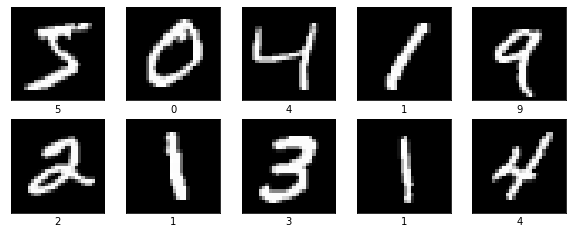

In [2]:
# size of the datsets
print("Size of the datasets:")
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)


# print a sample data
print("Printing sample data:")
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[i], cmap='gray')
    plt.xlabel(Ytrain[i])



# 3. Data preprocessing


(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)
Ytrain:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


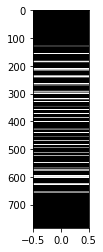

In [3]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale [0 to 1]; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale [0 to 1]; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

# print an input data

plt.imshow(Xtrain[1].reshape(28*28,1), cmap='gist_gray',aspect=0.005)
print('Ytrain: ', Ytrain[0])

# 4. Sequential Model Building with Activation for each layer

In [4]:
dnnModel = models.Sequential()

# specify the input size for in the hidden layer 1.
dnnModel.add(layers.Dense(64, activation='relu', input_shape= (28*28,)))
#Dropout to hidden layer 1
dnnModel.add(layers.Dropout(0.25))

# 1-hidden layer with L2 regularizer for 64 units.
#dnnModel.add(layers.Dense(64, activation='relu', input_shape= (28*28,),kernel_regularizer=regularizers.l2(0.0001)))

# output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# 5. Compile with categorical CE loss and metric accuracy

In [ ]:
# Configure  the model for training, by using appropriate optimizers 
# Refer https://keras.io/optimizers/
# User optimizers: adam,  sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
from tensorflow.python.keras.optimizers import adam
#from tensorflow.python.keras.optimizers import sgd
opt = adam(lr=0.001) #adam with lr of 1e-03
#opt = sgd(lr=0.01, momentum =0.95, nesterov=False) #sgd with lr of 1e-02 and momemtum 0.95
dnnModel.compile(optimizer = opt,
                 loss = 'categorical_crossentropy', 
                 metrics=['accuracy'] )

# 6. Train Model with cross validation, with total time taken shown for 20 epochs


In [6]:
# train the model

history = dnnModel.fit(Xtrain, Ytrain, epochs=20, batch_size=hyper_param_batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4345 - acc: 0.8731
Epoch 2/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2321 - acc: 0.9328
Epoch 3/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1873 - acc: 0.9446
Epoch 4/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1645 - acc: 0.9520
Epoch 5/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1464 - acc: 0.9564
Epoch 6/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1343 - acc: 0.9593
Epoch 7/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1223 - acc: 0.9629
Epoch 8/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1174 - acc: 0.9637
Epoch 9/20
60000/60000 [==============================] - 3s 42us/s

# 7. Visualise Loss and Accuracy history

In [7]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


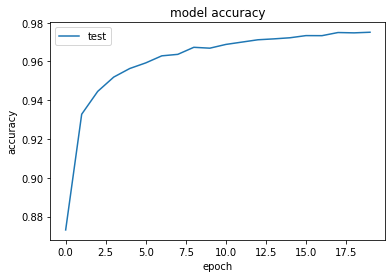

In [8]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

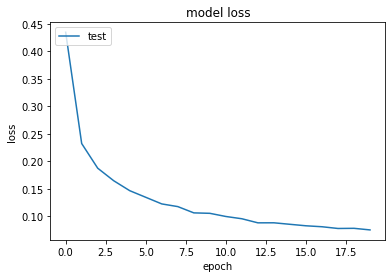

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

# 8. Show Confusion Matrix for validation dataset


(10000,)
(10000, 10)


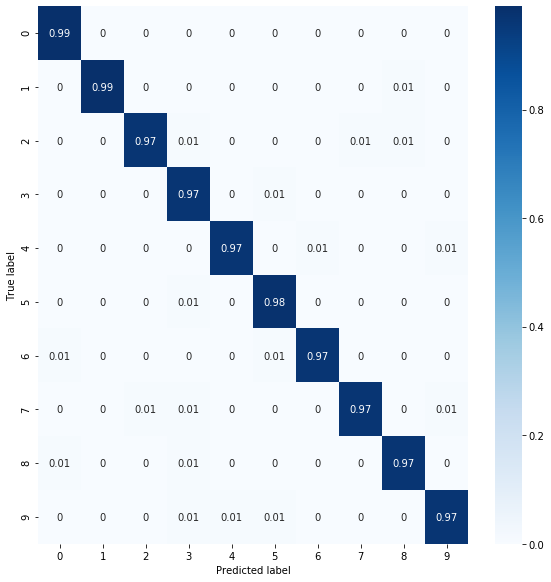

In [10]:
# Print confusion matrix
classes=[0,1,2,3,4,5,6,7,8,9]
YPred=dnnModel.predict_classes(Xtest)
print(YPred.shape)
print(Ytest.shape)
conf_mat = tf.math.confusion_matrix(labels=tf.argmax( Ytest, 1 ), predictions=YPred).numpy()

conf_mat_norm = np.around(conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
conf_mat_df = pd.DataFrame(conf_mat_norm,
                     index = classes, 
                     columns = classes)


figure = plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# RESULTS SUMMARY

We ran 32 combinations of 5 hyper parameters (2 each) of tuning: 
1. Network Depth : 
a.  1 Hidden Layer of 64 units
b.  3 Hidden Layer of 64-64-32 units
2. Regularisations : 
a) Dropout of ratio 0.25
b) Dropout of ratio 0.25 with L2 regulariser with factor 1e-04
3. Activations : 
    a) ReLU for every hidden layer
    b) Sigmoid for every hidden layer (softmax for final layer)
4. Batch Size : 
    a) 64
    b) 256
5. Optimisers : 
    a) Adam with lr 1e-03
    b) SGD with lr 1e-02 and momentum 0.95


* All the 32 combinations of code is available in the attached zip file.
* Summary of all the 32 execution results are included in the excel sheet.


**Best Results**


---


Loss was 0.0750 and Accuracy 0.9751 were acheived with the following combination

*   1 Hidden Layer with 64 Units
*   Drop out ratio of 0.25
*   ReLu
*   Batch Size of 64
*   Optimizer Adam with lr 1e-03

**Worst Results**

---
Loss was 0.5710 and Accuracy 0.8559 were acheived with the following combination
*   3 Hidden Layer of 64-64-32 units
*   Dropout of 0.25 with L2 Reg 1e-04
*   Sigmoid with evey hidden layer (softmax for final layer)
*   Batch size of 256
*   Optimizer  - SGD with 1e-02 and momentum 0.95















**Observations based on this experiment**

Our observations as mentioned below has led to the best results:  

1.   With introduction of additional hidden layers, the accuracy of the model decreases.
2.   Relu performs better than sigmoid in all the cases. 
3.   Adam optimizer has outperformed SGD in all the cases.
4.   Basic Dropout performs better than Dropout with L2 Regularization.
5.   Increase in batch size reduces accuracy.

The worst case results might have been a result of the following reason
Dropout removed 25% of units in each layer, but in addition the l2
regularizer caused many of the weights to become close to zero , hence many significant paths were lost in regularization with dropout leading to a decrease in accuracy (and increase in loss).


